# COP528 Coursework: Task 2 (Part 1)

**Task Prompt:** You will be provided with an image dataset, where each image contains meaningful objects, e.g., parachute, oil box and truck etc. You could either use an existing CNN network architecture or design your own CNN network for classifying test images into the predefined classes.

## Model 1: The Original LeNet Model

### Importing the required packages:

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

### Importing the Data files:

In [5]:
#Define the directory containing the images:
data_dir = "F218134_Assignment\\imageset"
train_dir = os.path.join(data_dir, 'train')
val_dir = os.path.join(data_dir, 'val')

#Create a dataset of the images and labels:
BATCH_SIZE = 32
IMG_SIZE = (128, 128)

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='categorical')

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='categorical')

# Get the class names from the directory names:
class_names = train_dataset.class_names
num_classes = len(class_names)

NotFoundError: Could not find directory F218134_Assignment\imageset\train

### Visualising Training Data

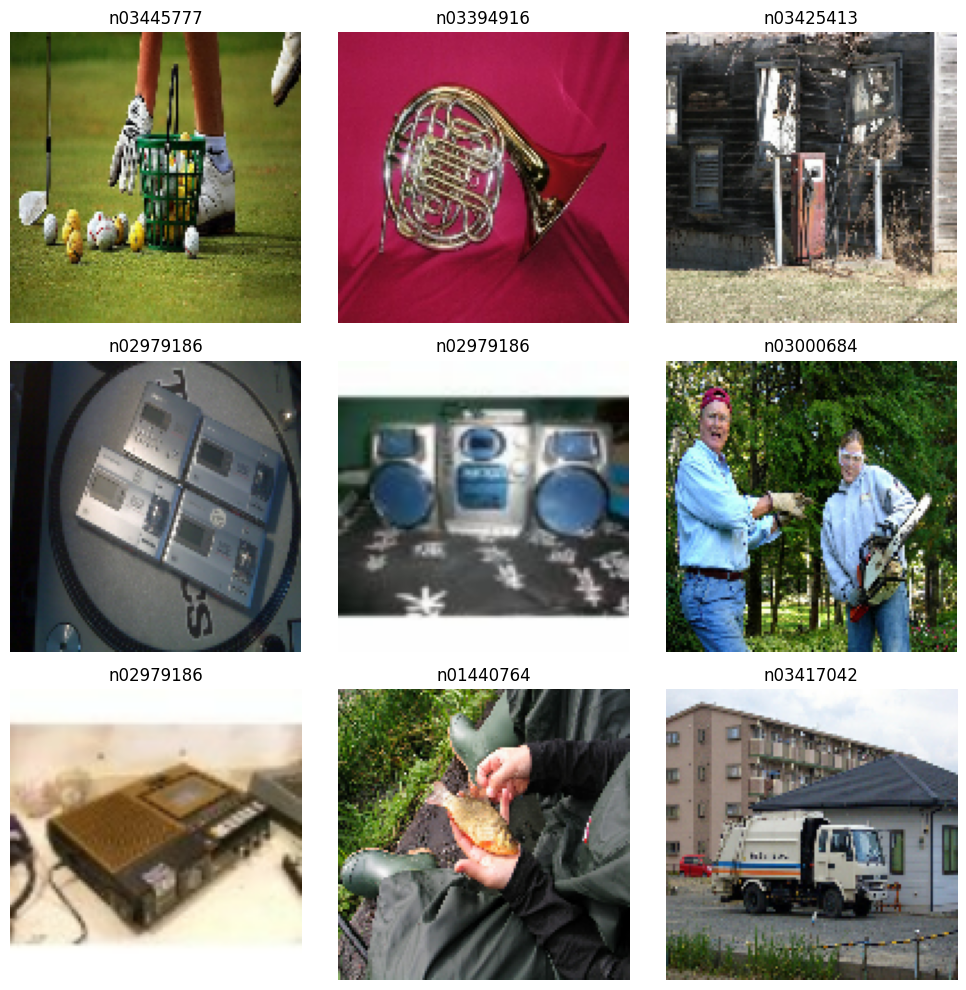

In [9]:
#Import the required packages:
import matplotlib.pyplot as plt
import tensorflow as tf

#Visualise training data to get an overview of image classification categories:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.flatten()

for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[np.argmax(labels[i])])
    plt.axis("off")

plt.tight_layout()
plt.show()

### Creating a Test dataset

In [10]:
#Create a new test dataset from the validation dataset:
val_batches = tf.data.experimental.cardinality(val_dataset)
test_dataset = val_dataset.take(val_batches // 5)
validation_dataset = val_dataset.skip(val_batches // 5)

print('Number of validation batches: %d' %
      tf.data.experimental.cardinality(validation_dataset))
print('Number of test batches: %d' %
      tf.data.experimental.cardinality(test_dataset))

Number of validation batches: 99
Number of test batches: 24


### Creation & Compilation of the base LeNet Model

In [11]:
#Importing required packages:
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from keras.optimizers import SGD

#Define the LeNet model:
model = Sequential()
#Normalise the image data by rescaling: 
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255)) 

#Adding convolutional & pooling layers to the model:
model.add(Conv2D(filters=6, kernel_size=(5, 5),
          activation='relu', input_shape=(32, 32, 3)))
model.add(AveragePooling2D())

model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
model.add(AveragePooling2D())

model.add(Flatten())

#Adding dense (output) layers to the model:
model.add(Dense(units=120, activation='relu'))
model.add(Dense(units=84, activation='relu'))
model.add(Dense(units=num_classes, activation='softmax'))

#Specifying optimizer to be used for compiling the model:
sgd = SGD(lr=0.01)

#Compile the model:
model.compile(optimizer=sgd, loss='categorical_crossentropy',
              metrics=['accuracy'])

c:\ProgramData\Anaconda3\envs\nvidia_rtx\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


### Training & Summary of the Model

In [12]:
#Train the model:
fitty_1 = model.fit(train_dataset, epochs=25, batch_size=BATCH_SIZE, validation_data=validation_dataset)

#Model summary:
model.summary()

#Evaluate test accuracy:
test_loss, test_acc = model.evaluate(val_dataset, verbose=2)
print('Test Accuracy: ', test_acc)

Epoch 1/25
296/296 [==============================] - 13s 18ms/step - loss: 2.1629 - accuracy: 0.2090 - val_loss: 1.9922 - val_accuracy: 0.3073
Epoch 2/25
296/296 [==============================] - 12s 41ms/step - loss: 1.9267 - accuracy: 0.3319 - val_loss: 1.8272 - val_accuracy: 0.3738
Epoch 3/25
296/296 [==============================] - 12s 41ms/step - loss: 1.7922 - accuracy: 0.3886 - val_loss: 1.7652 - val_accuracy: 0.3820
Epoch 4/25
296/296 [==============================] - 12s 41ms/step - loss: 1.6776 - accuracy: 0.4317 - val_loss: 1.8031 - val_accuracy: 0.3988
Epoch 5/25
296/296 [==============================] - 9s 30ms/step - loss: 1.5564 - accuracy: 0.4752 - val_loss: 1.5751 - val_accuracy: 0.4723
Epoch 6/25
296/296 [==============================] - 5s 17ms/step - loss: 1.4369 - accuracy: 0.5231 - val_loss: 1.5026 - val_accuracy: 0.4992
Epoch 7/25
296/296 [==============================] - 5s 17ms/step - loss: 1.3451 - accuracy: 0.5499 - val_loss: 1.4938 - val_accuracy: 0.

### Saving the Model

In [13]:
import pickle

model_location = "F218134_Assignment\\saved_models"

with open(model_location + 'lenet.pkl', 'wb') as file:
  pickle.dump(fitty_1.history, file)
    
model.save(model_location)

INFO:tensorflow:Assets written to: C:\Users\Supraja Saravanan\Desktop\F218134_Assignment\saved_models\assets


INFO:tensorflow:Assets written to: C:\Users\Supraja Saravanan\Desktop\F218134_Assignment\saved_models\assets


### Plotting the Performance

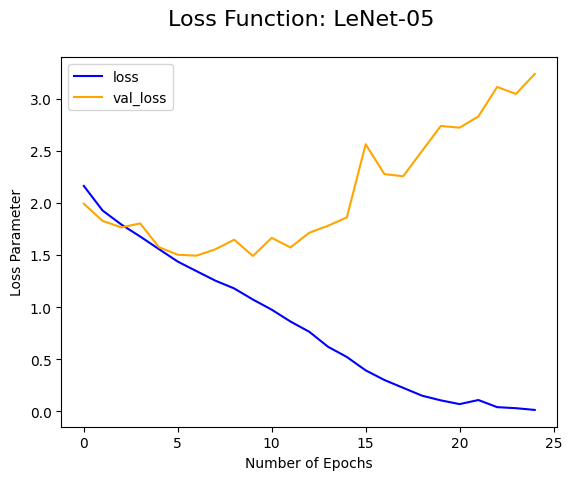

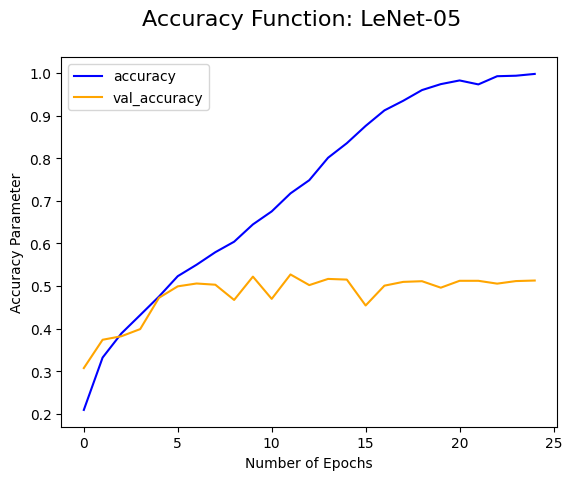

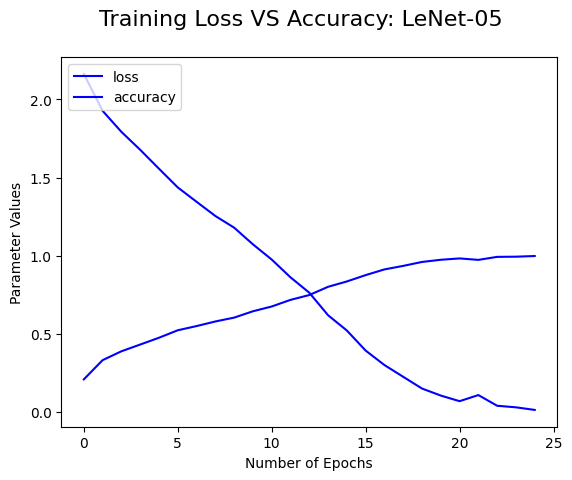

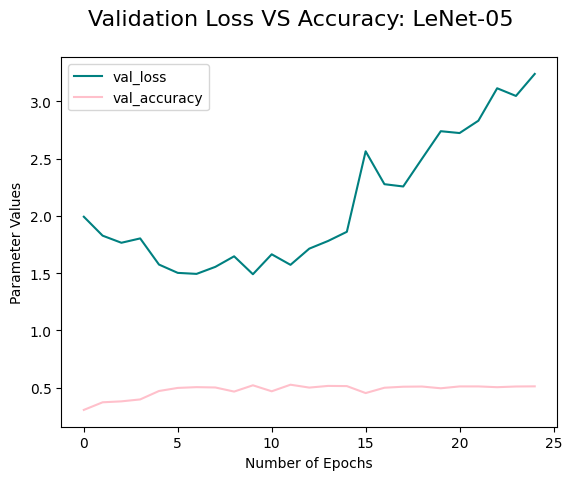

In [14]:
#Loss function:
fig = plt.figure()
plt.plot(fitty_1.history['loss'], color='blue', label='loss')
plt.plot(fitty_1.history['val_loss'], color='orange', label='val_loss')
plt.xlabel("Number of Epochs")
plt.ylabel("Loss Parameter")
fig.suptitle('Loss Function: LeNet-05', fontsize=16)
plt.legend(loc="upper left")
plt.show()

#Accuracy function:
fig = plt.figure()
plt.plot(fitty_1.history['accuracy'], color='blue', label='accuracy')
plt.plot(fitty_1.history['val_accuracy'], color='orange', label='val_accuracy')
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy Parameter")
fig.suptitle('Accuracy Function: LeNet-05', fontsize=16)
plt.legend(loc="upper left")
plt.show()

# Training Loss & Accuracy
fig = plt.figure()
plt.plot(fitty_1.history['loss'], color='blue', label='loss')
plt.plot(fitty_1.history['accuracy'], color='blue', label='accuracy')
plt.xlabel("Number of Epochs")
plt.ylabel("Parameter Values")
fig.suptitle('Training Loss VS Accuracy: LeNet-05', fontsize=16)
plt.legend(loc="upper left")
plt.show()

# Validation Loss & Accuracy
fig = plt.figure()
plt.plot(fitty_1.history['val_loss'], color='teal', label='val_loss')
plt.plot(fitty_1.history['val_accuracy'], color='pink', label='val_accuracy')
plt.xlabel("Number of Epochs")
plt.ylabel("Parameter Values")
fig.suptitle('Validation Loss VS Accuracy: LeNet-05', fontsize=16)
plt.legend(loc="upper left")
plt.show()
